# My Navigation Implementation

First start by importing some necessary packages for training including the agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Starting Agent


Next start up the unity environment

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Then assign the brain to be used by the unity environment

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Then reset the environment in order to extract some basic information

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

Then observe the initial state to find the size of the state and action space to pass to the agent

In [5]:
initialState = env_info.vector_observations[0]

agent = Agent(state_size=len(initialState), action_size=brain.vector_action_space_size)

state size:  37
action size:  4
seed:  0


Then we define our training function which, when invoked by default, will:
 - train the agent over at most 1800 episodes (in order to pass the rubric)
 - allow the agent to collect at most 100 bananas before ending the episode (yellow or blue)
 - start epsilon for e-greedy policy at 1 which decays at a rate of 0.995 per episode until 0.01 where it will stay for the remaining episodes
 - keep track of the most recent 100 episode scores in order to track the recent average (which an avg of >=13 is the "completion condition")

The loop per episode is making the agent come up with the next action according to the state and epsilon using its e-greedy policy.  Then the environment reflects that action and the agent observes, commits to its memory, and learns from the reward and next state that came from that state and action.  At the end of each episode information is printed regarding the current episode score, the previous 100 episode average, the total number of bananas obtained in the episode, and how many timesteps the agent took before the episode ended (due to line printing weirdness sometimes the time will look like it takes longer than it actually does).  Once the agent acheives an average of >=13 score over the last 100 episodes, it will stop training and save its weights in _checkpoint.pth_ .

In [6]:
def train(episodes=1800, max_bananas=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for episode in range(1, episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        bananas = 0
        time = 0
        while bananas < max_bananas:
            time += 1
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name]

            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            bananas += np.abs(reward)
            
            if done:
                break
                
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay * eps)
        print("\rEpisode {}: Score: {}, Recent Avg Score: {:.2f}, Bananas obtained: {}, Time: {}".format(episode, score, np.mean(scores_window), bananas, time), end='')
        
        if np.mean(scores_window) >= 13:
            print("\nSolved!")
            print("Got an average score (over 100 episodes) of {} in {} episodes".format(np.mean(scores_window), episode))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    return scores

Training is invoked and the entire scores per episode history is saved

In [7]:
#scores = train(episodes=10, max_bananas=10)  
scores = train()

Episode 535: Score: 18.0, Recent Avg Score: 13.00, Bananas obtained: 18.0, Time: 300
Solved!
Got an average score (over 100 episodes) of deque([14.0, 7.0, 10.0, 7.0, 9.0, 14.0, 11.0, 18.0, 14.0, 9.0, 10.0, 15.0, 9.0, 8.0, 7.0, 12.0, 11.0, 11.0, 10.0, 15.0, 14.0, 13.0, 14.0, 15.0, 12.0, 9.0, 15.0, 14.0, 11.0, 16.0, 17.0, 16.0, 8.0, 10.0, 16.0, 16.0, 14.0, 14.0, 20.0, 9.0, 20.0, 14.0, 13.0, 11.0, 16.0, 18.0, 18.0, 16.0, 17.0, 12.0, 13.0, 13.0, 12.0, 11.0, 13.0, 16.0, 11.0, 14.0, 19.0, 4.0, 15.0, 18.0, 16.0, 6.0, 13.0, 11.0, 16.0, 4.0, 8.0, 8.0, 17.0, 19.0, 6.0, 18.0, 12.0, 19.0, 8.0, 4.0, 18.0, 13.0, 16.0, 13.0, 8.0, 12.0, 16.0, 13.0, 10.0, 12.0, 12.0, 19.0, 18.0, 8.0, 14.0, 14.0, 19.0, 15.0, 16.0, 12.0, 11.0, 18.0], maxlen=100) in 535 episodes


Then we plot the scores over the episodes and should see an upwards trend

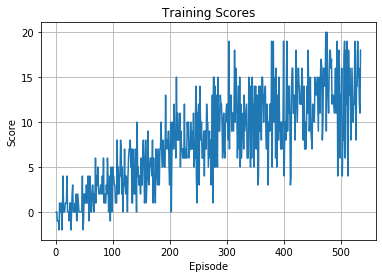

In [8]:
plt.plot(range(1, len(scores) + 1), scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.grid(True)
plt.title('Training Scores')
plt.show()

# See it in action!
The next few cells can be optionally run to see the final version of the agent in action in a non training setting

# (optional) Load saved checkpoint from training
Run this next cell if you want to load alternately saved checkpoints from different training sessions

In [ ]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# Run it
Run the next cell any number of times to see the agent in action.

In [10]:
env_info = env.reset(train_mode=False)[brain_name]

state = env_info.vector_observations[0]
score = 0
bananas = 0

while True:
    action = agent.act(state)
            
    env_info = env.step(action)[brain_name]

    state = env_info.vector_observations[0] 
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0]

    score += reward
    bananas += np.abs(reward)

    if done:
        break

print("Completed the episode with Score: {}, Total Bananas: {}".format(score, bananas))

Completed the episode with Score: 14.0, Total Bananas: 14.0


In [11]:
env.close()